# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# List out feature names

In [0]:
# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# Obtain the  train data 

In [0]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace = True, header = None, names = features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header = None, squeeze = True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names = ['Activity'], squeeze = True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [0]:
print("Information of train data")
print('*'*26, '\n')
train.info()

Information of train data
************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAcc-mean()-X to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


In [0]:
print("Shape of train data:", train.shape)
print("Number of rows in train data:", train.shape[0])
print("Number of columns in train data:", train.shape[1])

Shape of train data: (7352, 564)
Number of rows in train data: 7352
Number of columns in train data: 564


In [0]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace = True, header = None, names = features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header = None, squeeze = True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names = ['Activity'], squeeze = True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [0]:
print("Information of test data")
print('*'*25, '\n')
test.info()

Information of test data
************************* 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 564 entries, tBodyAcc-mean()-X to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 12.7+ MB


In [0]:
print("Shape of test data:", test.shape)
print("Number of rows in test data:", test.shape[0])
print("Number of columns in test data:", test.shape[1])

Shape of test data: (2947, 564)
Number of rows in test data: 2947
Number of columns in test data: 564


# Data Cleaning

 - ___<b> Check for duplicates<b>___

In [0]:
if sum(train.duplicated()) == 0 & sum(test.duplicated()) == 0:
    print("Number of duplicates in train data:", train.duplicated().sum())
    print("Number of duplicates in test data:", test.duplicated().sum(), '\n')
    print("There are no duplicates in the dataset.")
else:
    print("Please remove the duplicates")

Number of duplicates in train data: 0
Number of duplicates in test data: 0 

There are no duplicates in the dataset.


 - ___<b>Check for null values<b>___

In [0]:
if train.isnull().values.sum() == 0 & test.isnull().values.sum() == 0:
    print("Null values count for train data:", train.isnull().values.sum())
    print("Null values count for test data:", test.isnull().values.sum(), '\n')
    print("From above heatmap and data, we found no null values.")
else:
    print("Please remove null values from data or fill with relevant data.")

Null values count for train data: 0
Null values count for test data: 0 

From above heatmap and data, we found no null values.


# Graphical Visualization

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

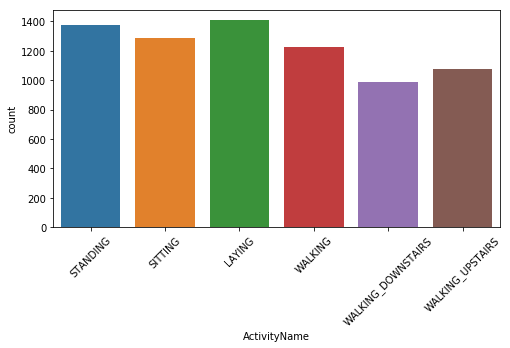

In [0]:
plt.figure(figsize = (8,4))
sns.countplot(train['ActivityName'])
plt.xticks(rotation = 45)

 - ___<b>Observation<b>___
    - Data is almost balanced.

([<matplotlib.patches.Wedge at 0x2790e438>,
 [Text(1.44312,0.989896,'1: WALKING : 1226'),
  Text(-0.379824,1.70828,'2 : WALKING_UPSTAIRS : 1073'),
  Text(-1.70957,0.373982,'3 : WALKING_DOWNSTAIRS : 986'),
  Text(-1.14436,-1.32399,'4 : SITTING : 1286'),
  Text(0.466162,-1.68677,'5 : STANDING : 1374'),
  Text(1.59696,-0.715704,'6 : LAYING : 1407')])

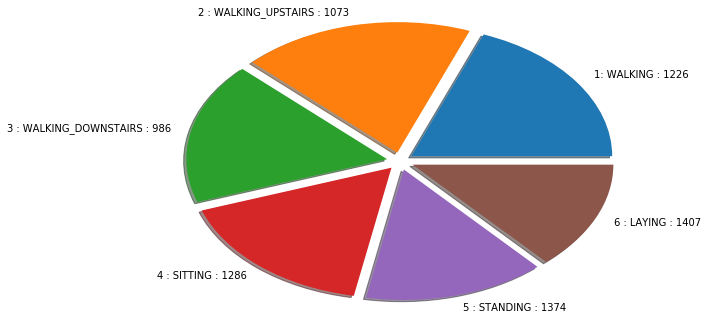

In [0]:
labels = ['1: WALKING : 1226', '2 : WALKING_UPSTAIRS : 1073', '3 : WALKING_DOWNSTAIRS : 986',
          '4 : SITTING : 1286', '5 : STANDING : 1374', '6 : LAYING : 1407']  
    
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(train.Activity.value_counts(), explode = explode, labels = labels, radius = 1.5, shadow = True)

 - ___<b>Observation<b>___
    - Maximum count is for Laying i.e 1407
    - Minimum count is for Walking Downstairs i.e 986

Text(0.5,1,"Subject's data vs count")

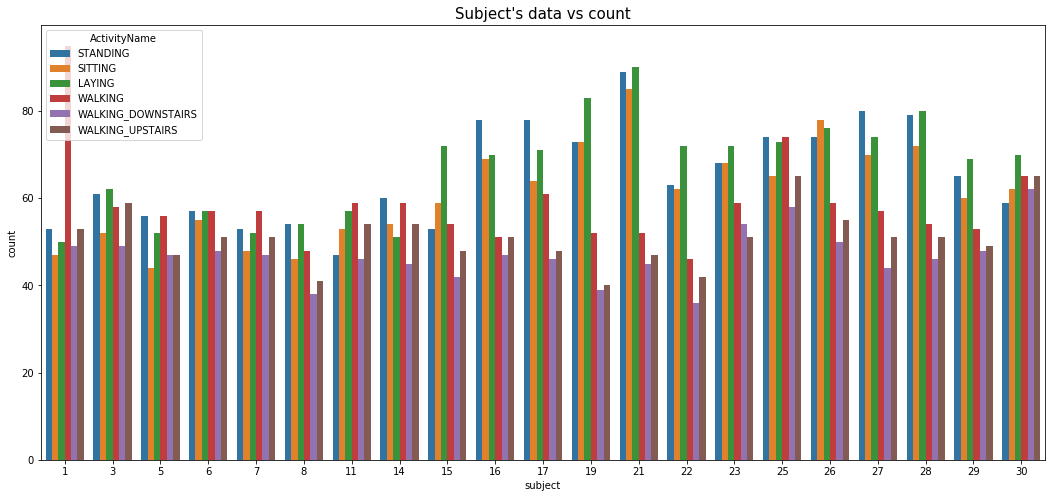

In [0]:
plt.figure(figsize = (18,8))
sns.countplot(x = train['subject'], hue = train['ActivityName'])
plt.title("Subject's data vs count", fontsize = 15)

 - ___<b>Observation<b>___
    
    - We have got almost same data from various users

In [0]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

print("Train columns:\n")
print(train.columns, '\n')
print('*'*50, '\n')
print("Test columns:\n")
print(test.columns)

Train columns:

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564) 

************************************************** 

Test columns:

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       

 - ___<b>Saving the above data<b>___

In [0]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# 1. Featuring Engineering from Domain Knowledge 


+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




# 2. Stationary and Moving activities are completely different

Text(0.2,9,'Moving Activities')

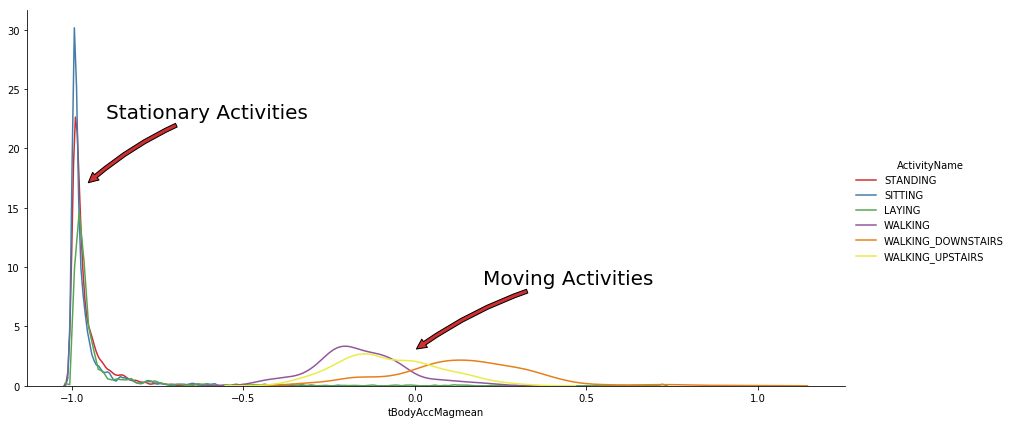

In [0]:
sns.set_palette("Set1", desat=0.80)
g = sns.FacetGrid(train, hue = 'ActivityName', size = 6, aspect = 2)
g = g.map(sns.distplot, 'tBodyAccMagmean', hist = False)
g = g.add_legend()

plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

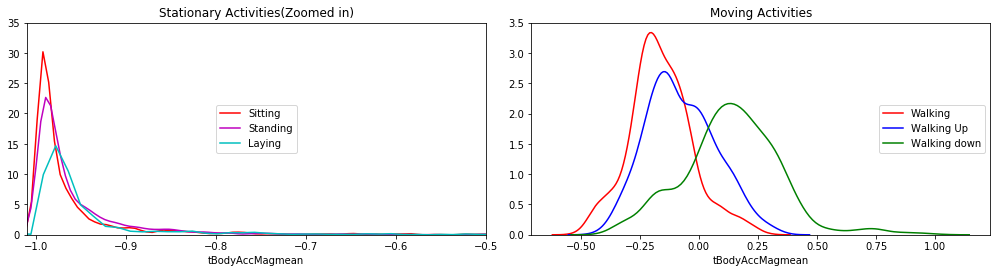

In [0]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

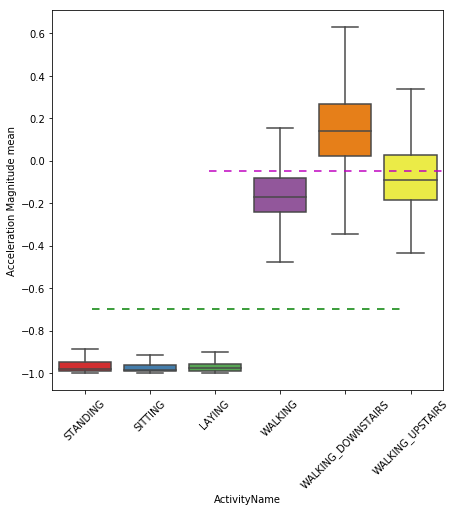

In [0]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=45)

 - __<b>Observations<b>__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponents also matters 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

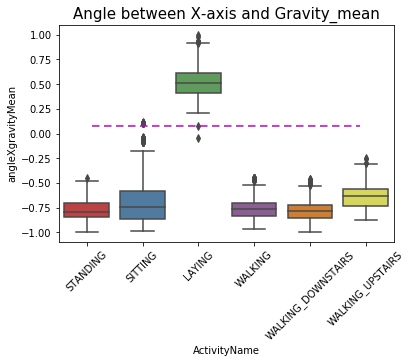

In [0]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 45)

 - ___<b>Observations<b>___:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

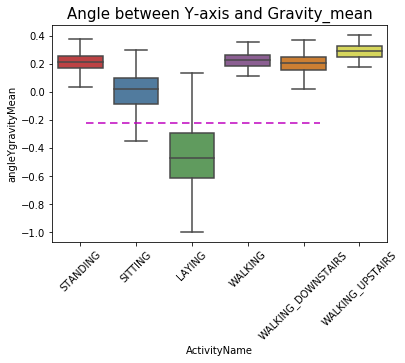

In [0]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 45)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')

# TSNE with different perplexities

### Reducing 561 dimension to 2 dimension

In [0]:
# Importing library
from sklearn.manifold import TSNE
n_iter = 1000

def tsne(x_tr, y_tr, perp):
    
    perplexity = perp
    print("\nWith perplexity {} and number of iterations: {}\n" .format(perplexity, n_iter))
    
    ts = TSNE(n_components = 2, perplexity = perp, n_iter = n_iter, verbose = 2)
    ts = ts.fit_transform(x_tr)
        
    # Stacking to obtain dataframe which then can be used to visualize
    ts_stack = np.vstack((ts.T, y_tr)).T
    df_ts = pd.DataFrame(data = ts_stack, columns = ('x_dim', 'y_dim', 'label'))
    
    # Visualization
    sns.set_style('darkgrid')
    gt = sns.FacetGrid(data = df_ts, hue = 'label', size = 8)
    gt.map(plt.scatter, 'x_dim', 'y_dim').add_legend()
    plt.title('Visualizing in 2 dimension with perplexity: {} and iterations: {}' .format(perplexity, n_iter), size = 15)
    plt.xlabel("Dimension 1", size = 15)
    plt.ylabel("Dimension 2", size = 15)

#### Getting x and y data to input

In [0]:
x_tr_ts = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_tr_ts = train['ActivityName']

print("Shape of x_train: {}" .format(x_tr_t.shape))
print("Shape of y_train: {}" .format(y_tr_t.shape))

Shape of x_train: (7352, 561)
Shape of y_train: (7352,)


### Perplexity 2


With perplexity 2 and number of iterations: 1000

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.489s...
[t-SNE] Computed neighbors for 7352 samples in 59.935s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.109s
[t-SNE] Iteration 50: error = 124.6487350, gradient norm = 0.0251724 (50 iterations in 108.511s)
[t-SNE] Iteration 100: error = 106.8219147, gradient norm = 0.0299008 (50 iterations in 18.749s)
[t-S

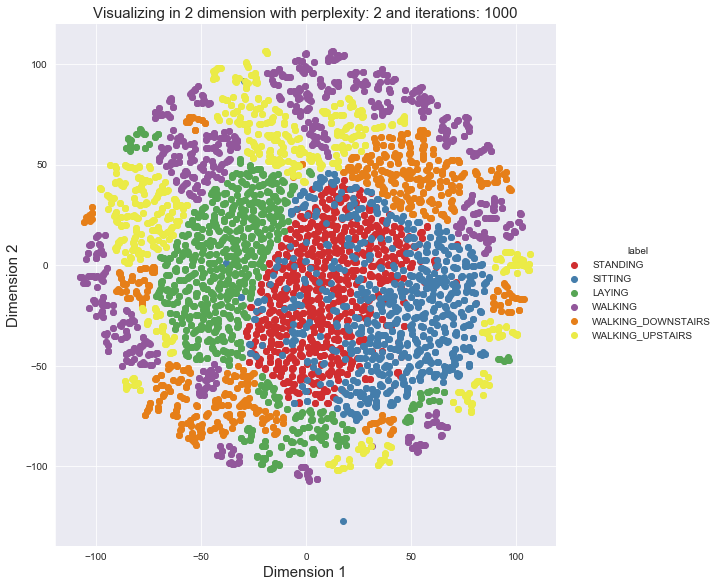

In [0]:
tsne(x_tr_ts, y_tr_ts, perp = 2)

### Observation

With perplexity 2 and iteration 1000, well, we can see good separation of activities but can be better with different perplexity. Let's see with increase in perplexity, how separation is done.

### Perplexity: 5


With perplexity 5 and number of iterations: 1000

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.480s...
[t-SNE] Computed neighbors for 7352 samples in 61.204s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.101s
[t-SNE] Iteration 50: error = 114.0248871, gradient norm = 0.0217223 (50 iterations in 19.543s)
[t-SNE] Iteration 100: error = 97.6309814, gradient norm = 0.0145679 (50 iterations in 13.286s)
[t-SN

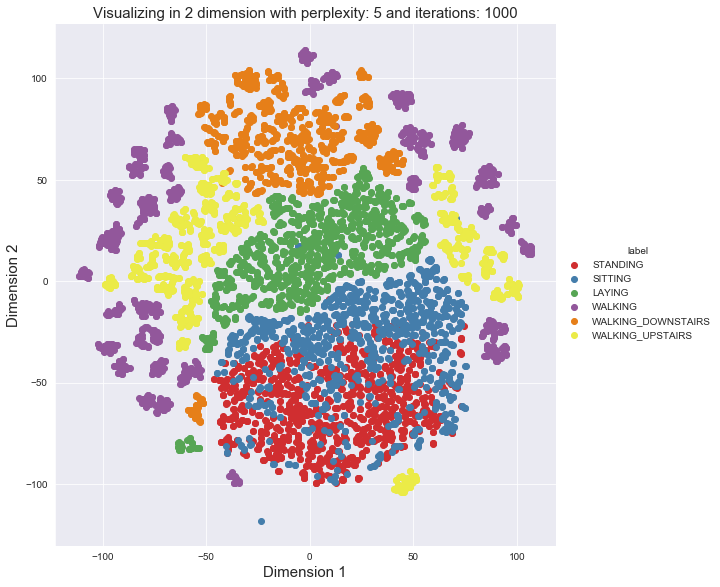

In [0]:
tsne(x_tr_ts, y_tr_ts, perp = 5)

### Observation 

With perplexity 5 and iteration 1000, separation is improved when compared to perplexity 2.

### Perplexity: 10


With perplexity 10 and number of iterations: 1000

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.485s...
[t-SNE] Computed neighbors for 7352 samples in 61.534s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.184s
[t-SNE] Iteration 50: error = 105.9964523, gradient norm = 0.0148659 (50 iterations in 22.571s)
[t-SNE] Iteration 100: error = 90.6240616, gradient norm = 0.0103785 (50 iterations in 15.239s)
[t-S

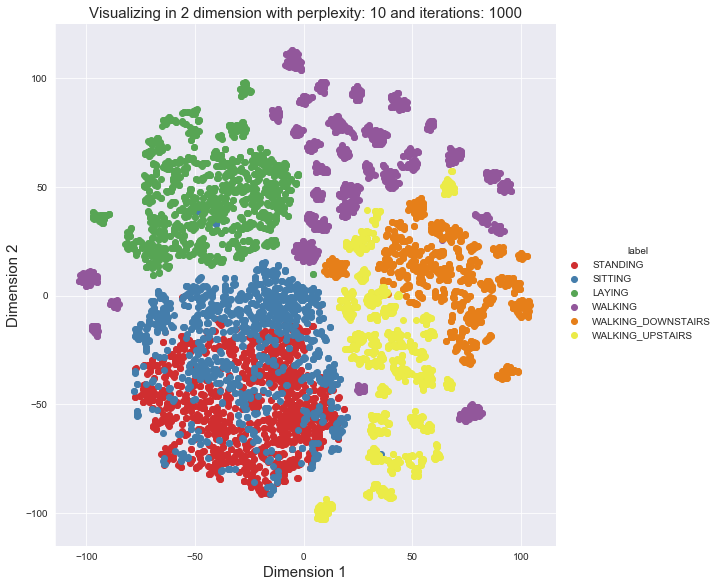

In [0]:
tsne(x_tr_ts, y_tr_ts, perp = 10)

### Observation 

With perplexity 10 and iteration 1000, separation is improved when compared to perplexity 2 and 5.

### Perplexity: 20


With perplexity 20 and number of iterations: 1000

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.478s...
[t-SNE] Computed neighbors for 7352 samples in 62.866s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.362s
[t-SNE] Iteration 50: error = 97.4729080, gradient norm = 0.0184257 (50 iterations in 37.327s)
[t-SNE] Iteration 100: error = 83.8648605, gradient norm = 0.0081573 (50 iterations in 19.879s)
[t-SN

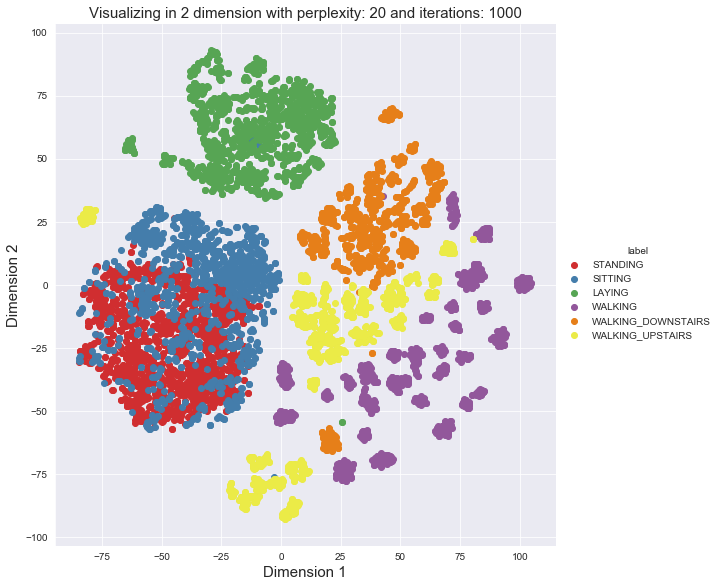

In [0]:
tsne(x_tr_ts, y_tr_ts, perp = 20)

### Observation 

With perplexity 20 and iteration 1000, separation is improved when compared to perplexity 2, 5 and 20.

### Perplexity: 50


With perplexity 50 and number of iterations: 1000

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.492s...
[t-SNE] Computed neighbors for 7352 samples in 65.634s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.873s
[t-SNE] Iteration 50: error = 85.6891708, gradient norm = 0.0314668 (50 iterations in 32.989s)
[t-SNE] Iteration 100: error = 75.5255966, gradient norm = 0.0041454 (50 iterations in 28.609s)
[t-S

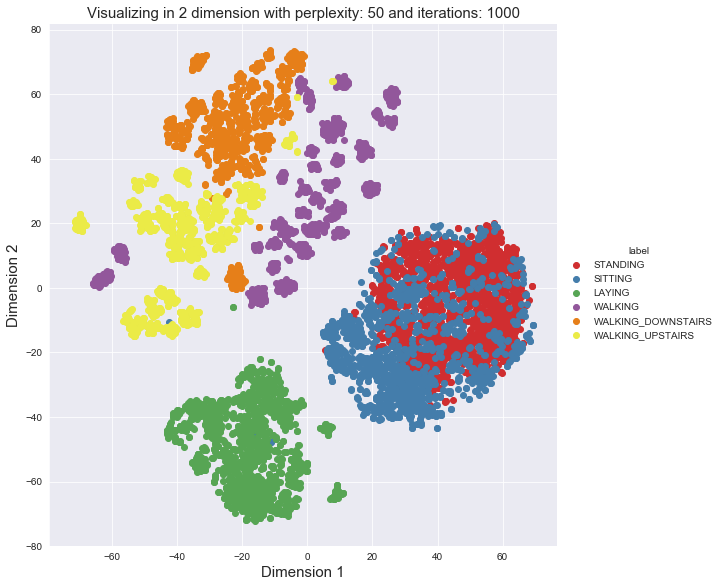

In [0]:
tsne(x_tr_ts, y_tr_ts, perp = 50)

### Observation 

With perplexity 20 and iteration 1000, separation is improved when compared to perplexity 2, 5, 20 and 50.

In [0]:
# Overall observation

 1.As perplexity is changing i.e 2, 5, 10, 20 and 50, we can see that the separation of activities is getting better and better.
 
 2.We can see that increase in perplexity upto ~50, separation of activities is actually improving.

# LSTM

In [0]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [0]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [0]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'drive/My Drive/CS_HAR/{signal}_{subset}.txt'
        #filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [0]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'drive/My Drive/CS_HAR/y_{subset}.txt'
    #filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [0]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [0]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [0]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [0]:
# Initializing parameters
epochs = 15
batch_size = 16

In [0]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [0]:
X_train.shape

(7352, 128, 9)

In [0]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print("Timesteps:", timesteps)
print("Input dimension:", input_dim)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Timesteps: 128
Input dimension: 9
Shape of X_train: (7352, 128, 9)
Shape of X_test: (2947, 128, 9)
Shape of Y_train: (7352, 6)
Shape of Y_test: (2947, 6)


# Defining 'plt_la' function

In [0]:
# Defining 'plt_la' function

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_la(x, vy, ty, ax, t, colors=['b']):
 
  if t == 'loss':
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.title("Epoch vs Loss")
    plt.legend()
    plt.grid()
  
  if t == 'acc':
    ax.plot(x, vy, 'b', label="Validation Accuracy")
    ax.plot(x, ty, 'r', label="Train Accuracy")
    plt.title("Epoch vs Accuracy")
    plt.legend()
    plt.grid()

# Defining a function 'plotting' to visualize epoch vs loss

In [0]:
# Defining a function 'plotting' to visualize epoch vs loss

def plotting(history, t):

  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy')

  # list of epoch numbers
  x = list(range(1,epochs+1))

  # print(history.history.keys())
  # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
  # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  # we will get val_loss and val_acc only when you pass the paramter validation_data
  # val_loss : validation loss
  # val_acc : validation accuracy

  # loss : training loss
  # acc : train accuracy
  # for each key in histrory.histrory we will have a list of length equal to number of epochs
  
  if t == 'loss':
    vy = history.history['val_loss']
    ty = history.history['loss']
  
    plt_la(x, vy, ty, ax, t)
    
  if t == 'acc':
    vy = history.history['val_acc']
    ty = history.history['acc']
  
    plt_la(x, vy, ty, ax, t)
  
  return vy, ty

## Parameters

 LSTM layers: 1
 LSTM units: 64
 Dropout rate: 0.25

In [0]:
n_hidden = 64

model_1 = Sequential()

# 1 LSTM layer
model_1.add(LSTM(n_hidden, input_shape = (timesteps, input_dim)))     # 1 LSTM

model_1.add(Dropout(0.25))
model_1.add(Dense(n_classes, activation = 'sigmoid'))
model_1.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                18944     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history_1 = model_1.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_data = (X_test, Y_test))

# Final evaluation of the model
scores_1 = model_1.evaluate(X_test, Y_test, verbose = 1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/15
7352/7352 [==============================] - 88s 12ms/step - loss: 0.3254 - acc: 0.8677 - val_loss: 0.2616 - val_acc: 0.8865
Epoch 2/15
7352/7352 [==============================] - 89s 12ms/step - loss: 0.2366 - acc: 0.8976 - val_loss: 0.2054 - val_acc: 0.9155
Epoch 3/15
7352/7352 [==============================] - 88s 12ms/step - loss: 0.1806 - acc: 0.9270 - val_loss: 0.1844 - val_acc: 0.9315
Epoch 4/15
7352/7352 [==============================] - 87s 12ms/step - loss: 0.1347 - acc: 0.9525 - val_loss: 0.1590 - val_acc: 0.9449
Epoch 5/15
7352/7352 [==============================] - 87s 12ms/step - loss: 0.1042 - acc: 0.9647 - val_loss: 0.1111 - val_acc: 0.9572
Epoch 6/15
7352/7352 [==============================] - 88s 12ms/step - loss: 0.0802 - acc: 0.9718 - val_loss: 0.1168 - val_acc: 0.9571
Epoch 7/15
7352/7352 [==============================] - 87s 12ms/step - loss: 0.0696 - acc: 0.9744 - val_loss: 0.1189 - val_acc: 0.9634


# Calling 'plotting' function to visualize epoch vs loss

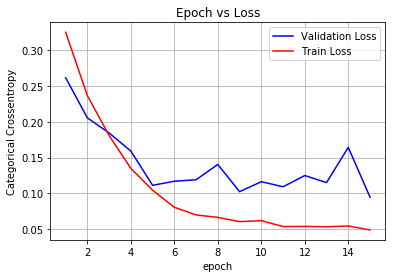

In [0]:
v_l_1, t_l_1 = plotting(history_1, 'loss')

# Calling 'plotting' function to visualize epoch vs accuracy

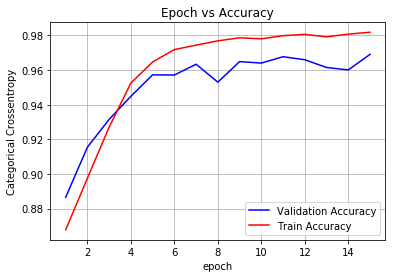

In [0]:
v_a_1, t_a_1 = plotting(history_1, 'acc')

# Observation

In [0]:
tr_a_1 = np.round(max(t_a_1),3)
va_a_1 = np.round(max(v_a_1),3)

print("Train accuracy:", tr_a_1)
print("Validation accuracy:", va_a_1, '\n')

tr_l_1 = np.round(min(t_l_1),3)
va_l_1 = np.round(min(v_l_1),3)

print("Train loss:", tr_l_1)
print("Validation loss:", va_l_1)

Train accuracy: 0.982
Validation accuracy: 0.969 

Train loss: 0.049
Validation loss: 0.094


# Confusion Matrix

In [0]:
# Confusion Matrix
print(confusion_matrix(Y_test, model_1.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 530        7         0        0                   0   
SITTING                  0      417        71        1                   0   
STANDING                 0      126       405        1                   0   
WALKING                  0        4         2      454                  23   
WALKING_DOWNSTAIRS       0        0         0        0                 406   
WALKING_UPSTAIRS         0        4         2        4                   3   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           0  
WALKING                           13  
WALKING_DOWNSTAIRS                14  
WALKING_UPSTAIRS                 458  


# ObservationS
 
1.Laying: 530 correctly predicted and 0 wrongly predicted.
2.Sitting: 417 correctly predicted and 141 wrongly predicted.
3.Standing: 405 correctly predicted and 75 wrongly predicted.
4.Walking: 454 correctly predicted and 6 wrongly predicted.
5.Walking_Downstairs: 406 correctly predicted and 26 wrongly predicted.
6.Walking_Upstairs: 458 correctly predicted and 29 wrongly predicted.
7..Laying is well predicted while sitting shows more error when compared to other activities. 

## Parameters

1.LSTM layers: 2
2.LSTM units: 100
3.Dropout rate: 0.5

In [0]:
n_hidden_2 = 100

model_2 = Sequential()

# 2 LSTM layer
model_2.add(LSTM(n_hidden_2, input_shape = (timesteps, input_dim), return_sequences = True))  # 1 LSTM
model_2.add(Dropout(0.50))
model_2.add(LSTM(n_hidden_2))                         # 2 LSTM

model_2.add(Dropout(0.50))
model_2.add(Dense(n_classes, activation = 'sigmoid'))
model_2.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 100)          44000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 606       
Total params: 125,006
Trainable params: 125,006
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history_2 = model_2.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size , validation_data = (X_test, Y_test))

# Final evaluation of the model
scores_2 = model_2.evaluate(X_test, Y_test, verbose = 1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/15
7352/7352 [==============================] - 175s 24ms/step - loss: 0.2893 - acc: 0.8780 - val_loss: 0.2923 - val_acc: 0.8929
Epoch 2/15
7352/7352 [==============================] - 175s 24ms/step - loss: 0.1678 - acc: 0.9347 - val_loss: 0.1556 - val_acc: 0.9441
Epoch 3/15
7352/7352 [==============================] - 176s 24ms/step - loss: 0.0990 - acc: 0.9662 - val_loss: 0.1305 - val_acc: 0.9600
Epoch 4/15
7352/7352 [==============================] - 177s 24ms/step - loss: 0.0773 - acc: 0.9728 - val_loss: 0.1192 - val_acc: 0.9612
Epoch 5/15
7352/7352 [==============================] - 174s 24ms/step - loss: 0.0611 - acc: 0.9777 - val_loss: 0.1136 - val_acc: 0.9667
Epoch 6/15
7352/7352 [==============================] - 174s 24ms/step - loss: 0.0573 - acc: 0.9802 - val_loss: 0.0972 - val_acc: 0.9706
Epoch 7/15
7352/7352 [==============================] - 175s 24ms/step - loss: 0.0582 - acc: 0.9778 - val_loss: 0.1008 - val_acc: 

# Calling 'plotting' function to visualize epoch vs loss

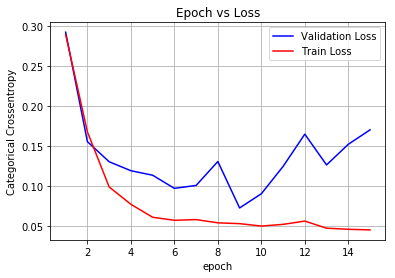

In [0]:
v_l_2, t_l_2 = plotting(history_2, 'loss')

# Calling 'plotting' function to visualize epoch vs accuracy

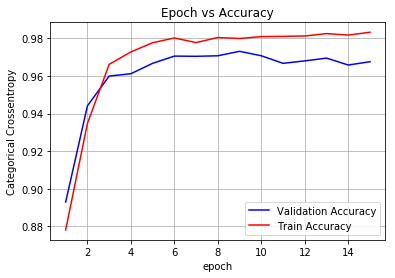

In [0]:
v_a_2, t_a_2 = plotting(history_2, 'acc')

# Observation

In [0]:
tr_a_2 = np.round(max(t_a_2),3)
va_a_2 = np.round(max(v_a_2),3)

print("Train accuracy:", tr_a_2)
print("Validation accuracy:", va_a_2, '\n')

tr_l_2 = np.round(min(t_l_2),3)
va_l_2 = np.round(min(v_a_2),3)

print("Train loss:", tr_l_2)
print("Validation loss:", va_l_2)

Train accuracy: 0.983
Validation accuracy: 0.973 

Train loss: 0.045
Validation loss: 0.893


# Confusion Matrix

In [0]:
# Confusion Matrix
print(confusion_matrix(Y_test, model_2.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 515        0         0        0                   0   
SITTING                  4      374        94        0                   0   
STANDING                 0       53       478        1                   0   
WALKING                  0        0         0      474                  22   
WALKING_DOWNSTAIRS       0        0         0       34                 383   
WALKING_UPSTAIRS         0        0         0       34                  11   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            22  
SITTING                           19  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 3  
WALKING_UPSTAIRS                 426  


# Observations
1.Laying: 515 correctly predicted and 4 wrongly predicted.
2.Sitting: 374 correctly predicted and 53 wrongly predicted.
3.Standing: 478 correctly predicted and 94 wrongly predicted.
4.Walking_Downstairs: 383 correctly predicted and 33 wrongly predicted.
5.Walking: 474 correctly predicted and 69 wrongly predicted.
6.Walking_Upstairs: 426 correctly predicted and 44 wrongly predicted.
7.Laying is well predicted while sitting shows more error when compared to other activities

## Parameters
1.LSTM layers: 3
2.LSTM units: 150
3.Dropout rate: 0.75

In [0]:
n_hidden_3 = 150

model_3 = Sequential()

# 3 LSTM layer
model_3.add(LSTM(n_hidden_3, input_shape = (timesteps, input_dim), return_sequences = True))  # 1 LSTM
model_3.add(Dropout(0.75))
model_3.add(LSTM(n_hidden_3, return_sequences = True))    # 2 LSTM
model_3.add(Dropout(0.75))
model_3.add(LSTM(n_hidden_3))                             # 3 LSTM

model_3.add(Dropout(0.75))
model_3.add(Dense(n_classes, activation = 'sigmoid'))
model_3.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128, 150)          96000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 150)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128, 150)          180600    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 150)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 906       
Total para

In [0]:
history_3 = model_3.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_data = (X_test, Y_test))

# Final evaluation of the model
scores_3 = model_3.evaluate(X_test, Y_test, verbose = 1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/15
7352/7352 [==============================] - 274s 37ms/step - loss: 0.3115 - acc: 0.8689 - val_loss: 0.2454 - val_acc: 0.8878
Epoch 2/15
7352/7352 [==============================] - 270s 37ms/step - loss: 0.2096 - acc: 0.9048 - val_loss: 0.2392 - val_acc: 0.8906
Epoch 3/15
7352/7352 [==============================] - 267s 36ms/step - loss: 0.1670 - acc: 0.9239 - val_loss: 0.1576 - val_acc: 0.9429
Epoch 4/15
7352/7352 [==============================] - 265s 36ms/step - loss: 0.1069 - acc: 0.9632 - val_loss: 0.1407 - val_acc: 0.9587
Epoch 5/15
7352/7352 [==============================] - 266s 36ms/step - loss: 0.0702 - acc: 0.9755 - val_loss: 0.1143 - val_acc: 0.9679
Epoch 6/15
7352/7352 [==============================] - 265s 36ms/step - loss: 0.0611 - acc: 0.9792 - val_loss: 0.1195 - val_acc: 0.9672
Epoch 7/15
7352/7352 [==============================] - 265s 36ms/step - loss: 0.0675 - acc: 0.9786 - val_loss: 0.1318 - val_acc: 

# Calling 'plotting' function to visualize epoch vs loss

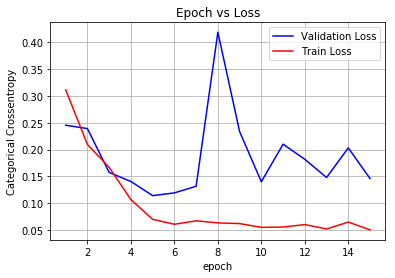

In [0]:
v_l_3, t_l_3 = plotting(history_3, 'loss')

# Calling 'plotting' function to visualize epoch vs accuracy

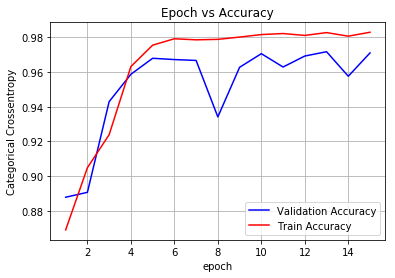

In [0]:
v_a_3, t_a_3 = plotting(history_3, 'acc')

# Observation

In [0]:
tr_a_3 = np.round(max(t_a_3),3)
va_a_3 = np.round(max(v_a_3),3)

print("Train accuracy:", tr_a_3)
print("Validation accuracy:", va_a_3, '\n')

tr_l_3 = np.round(min(t_l_3),3)
va_l_3 = np.round(min(v_a_3),3)

print("Train loss:", tr_l_3)
print("Validation loss:", va_l_3)

Train accuracy: 0.983
Validation accuracy: 0.972 

Train loss: 0.051
Validation loss: 0.888


# Confusion Matrix

In [0]:
# Confusion Matrix
print(confusion_matrix(Y_test, model_3.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  2      425        57        0                   0   
STANDING                 0      115       414        0                   0   
WALKING                  0        0         0      443                  11   
WALKING_DOWNSTAIRS       0        0         0        5                 410   
WALKING_UPSTAIRS         0        0         0        2                   8   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            7  
STANDING                           3  
WALKING                           42  
WALKING_DOWNSTAIRS                 5  
WALKING_UPSTAIRS                 461  


# ObservationS
 
 1.Laying: 537 correctly predicted and 2 wrongly predicted.
 2.Sitting: 425 correctly predicted and 115 wrongly predicted.
 3.Standing: 414 correctly predicted and 57 wrongly predicted.
 4.Walking: 443 correctly predicted and 7 wrongly predicted.
 5.Walking_Downstairs: 410 correctly predicted and 19 wrongly predicted.
 6.Walking_Upstairs: 461 correctly predicted and 57 wrongly predicted.
 7.Laying is well predicted while sitting shows more error when compared to other activities. 

# Pretty Table

In [0]:
from prettytable import PrettyTable

print('\n')
a = PrettyTable()
a.field_names = ['S.No', 'LSTM Units', 'LSTM Layers', 'Drop Out', 'Test Loss', 'Test Accuracy']
a.add_row([1, 64, 1, 0.25, va_l_1, va_a_1])
a.add_row([2, 100, 2, 0.5, va_l_2, va_a_2])
a.add_row([3, 150, 3, 0.75, va_l_3, va_a_3])

print(a.get_string(title = "LSTM 1 and 3 Activation: sigmoid,    Optimizer: adam"))



+------+------------+-------------+----------+-----------+---------------+
| S.No | LSTM Units | LSTM Layers | Drop Out | Test Loss | Test Accuracy |
+------+------------+-------------+----------+-----------+---------------+
|  1   |     64     |      1      |   0.25   |   0.094   |     0.969     |
|  2   |    100     |      2      |   0.5    |   0.893   |     0.973     |
|  3   |    150     |      3      |   0.75   |   0.888   |     0.972     |
+------+------------+-------------+----------+-----------+---------------+


# CONCLUSIONS:

1.Import dataset 
2.Apply Exploratory Data Analysis
3.Clean the data
4.feature engineering
5.visualize important features
6.Apply T-SNE
7.Apply Lstm,while applying prepare data and obtain confusion matrix then do Lstm Hyperparameter tuning.
As we can see that increase in LSTM layers and dropout rate is actually resulting in increase in accuracy and loss.
Accuracy:As LSTM layer is increased by 1 and dropout rate by 0.25, accuracy is increased by 0.2%.